# Time Series Stock Forecast

In [1]:
# load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import fix_yahoo_finance as yf
from pandas_datareader import data as pdr

In [2]:
stock = 'RAD'
start = '2015-01-01' 
end = '2017-12-08'
df = pdr.get_data_yahoo(stock, start, end)

[*********************100%***********************]  1 of 1 downloaded

In [3]:
df.shape

(741, 6)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,7.65,7.75,7.50,7.63,7.63,27414800
2015-01-05,7.63,7.69,7.46,7.52,7.52,27263800
2015-01-06,7.60,7.72,7.48,7.71,7.71,42656600
2015-01-07,7.78,7.80,7.68,7.76,7.76,20409100
2015-01-08,7.82,7.90,7.79,7.85,7.85,20733100


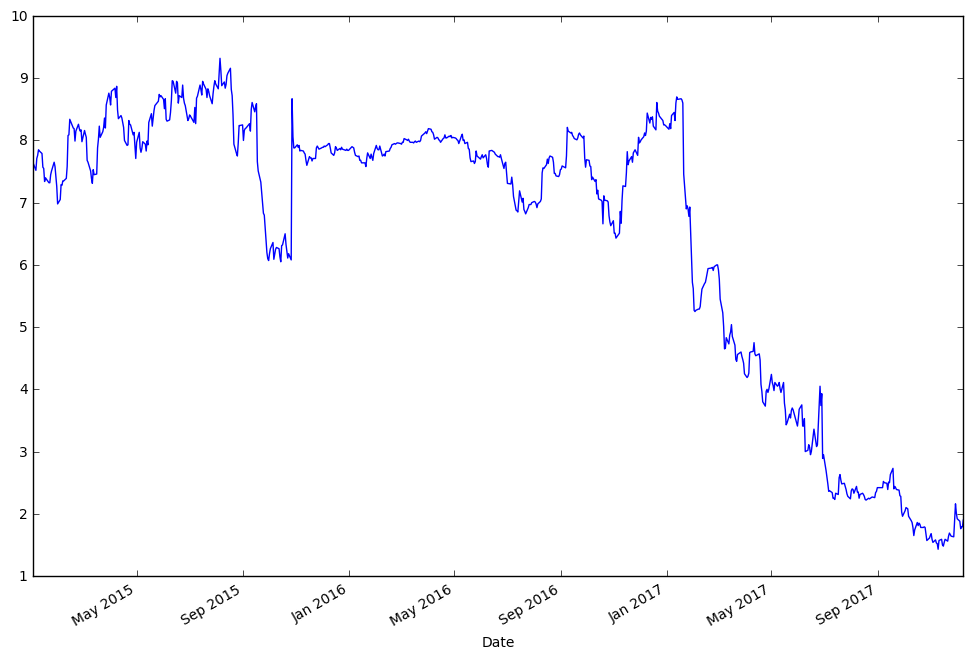

In [5]:
df['Adj Close'].plot(figsize=(12,8))
plt.show()

In [6]:
df = df.reset_index().rename(columns={'Date':'ds', 'Adj Close':'y'})
#df['ds'] = pd.to_datetime(df.index)
#df['y'] = pd.DataFrame(df['Adj Close'])

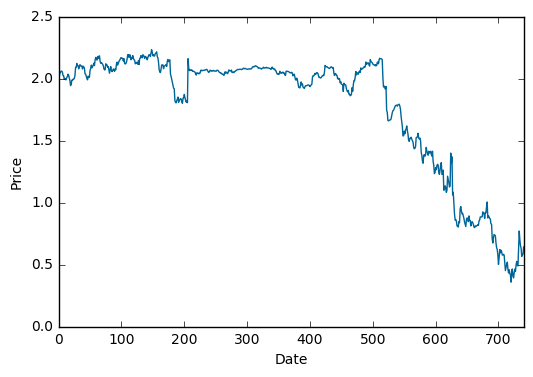

In [7]:
# Log Transform Data
df['y'] = pd.DataFrame(np.log(df['y']))

# plot data
ax = df['y'].plot(color='#006699');
ax.set_ylabel('Price');
ax.set_xlabel('Date');
plt.show()

In [8]:
# train test split
df_train = df[:740]
df_test = df[740:]

In [9]:
# Model Fitting
# instantiate the Prophet class
mdl = Prophet(interval_width=0.95, daily_seasonality=True)
 
# fit the model on the training data
mdl.fit(df_train)
 
# define future time frame
future = mdl.make_future_dataframe(periods=24, freq='MS')

In [10]:
# instantiate the Prophet class
mdl = Prophet(interval_width=0.95, daily_seasonality=True)
 
# fit the model on the training data
mdl.fit(df_train)
 
# define future time frame
future = mdl.make_future_dataframe(periods=24, freq='MS')

In [11]:
# generate the forecast
forecast = mdl.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
759,2019-08-01,-2.045143,-3.797751,-0.174812
760,2019-09-01,-2.101840,-3.997810,-0.138655
761,2019-10-01,-2.297782,-4.376478,-0.200311
762,2019-11-01,-2.445825,-4.722101,-0.242520
763,2019-12-01,-2.376222,-4.797131,-0.006823


In [22]:
forecast['yhat_lower'].head()

0    1.920551
1    1.934395
2    1.950239
3    1.954287
4    1.954002
Name: yhat_lower, dtype: float64

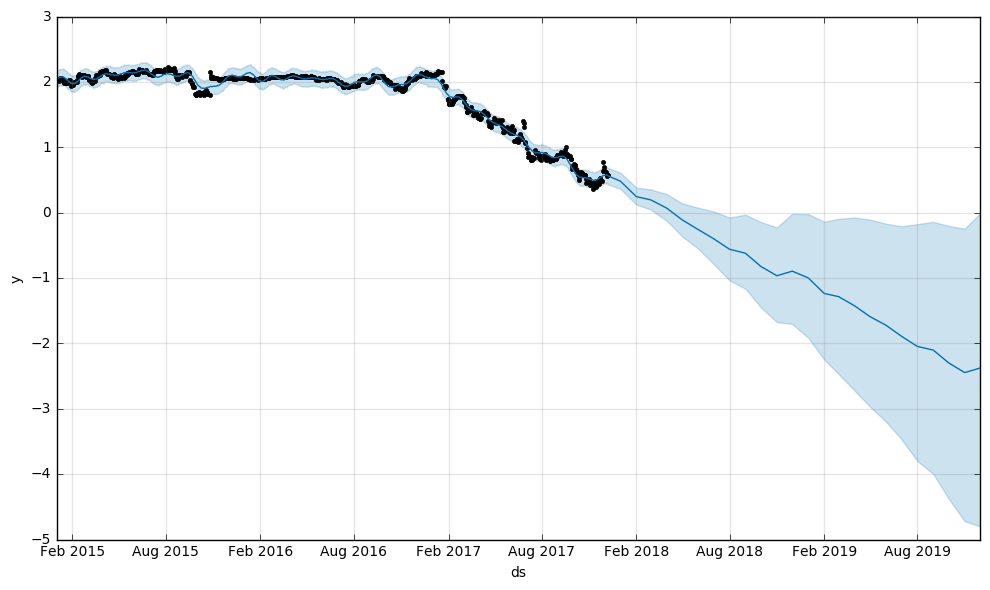

In [12]:
mdl.plot(forecast);
plt.show()

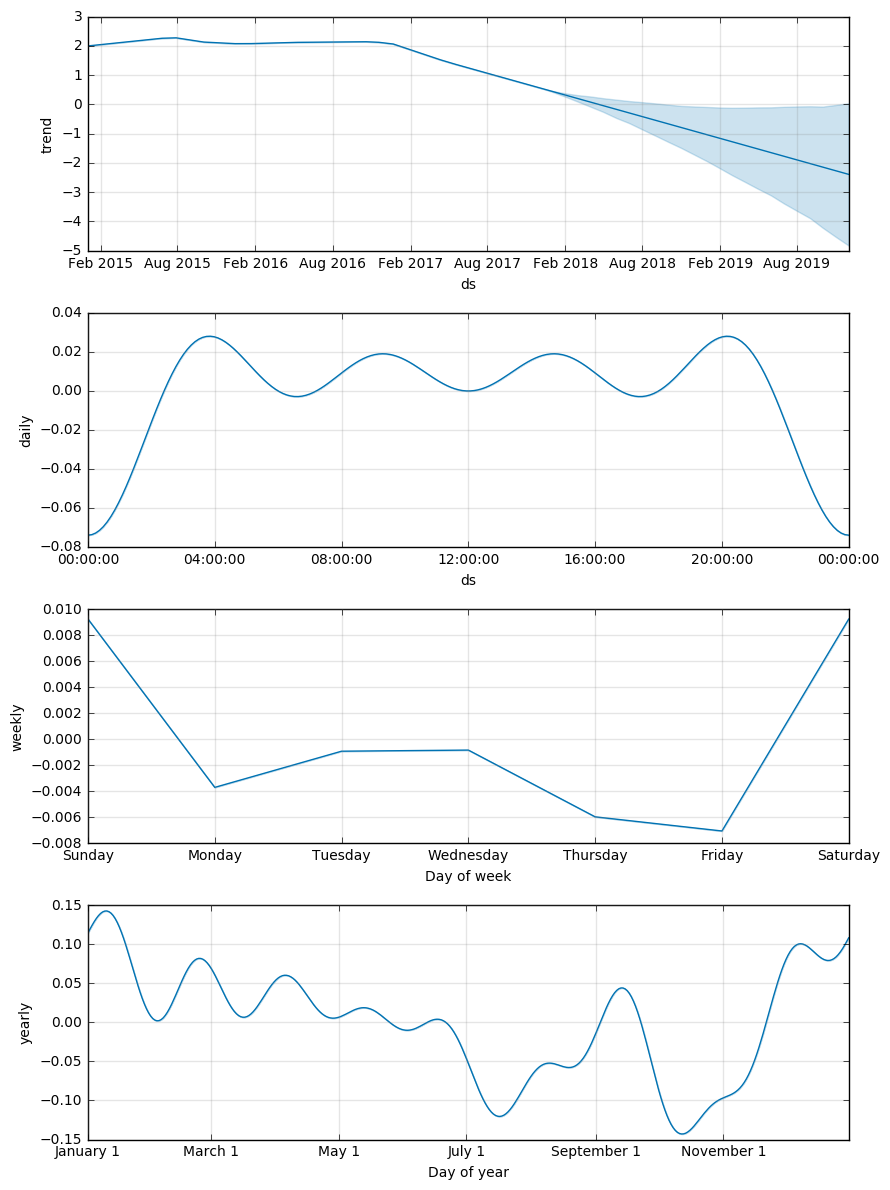

In [13]:
# plot time series components
mdl.plot_components(forecast)
plt.show()

In [14]:
import math
# retransform using e
y_hat = np.exp(forecast['yhat'][740:])
y_true = np.exp(df['y'])
 
# compute the mean square error
mse = ((y_hat - y_true) ** 2).mean()
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))

Prediction quality: 0.08 MSE (0.28 RMSE)


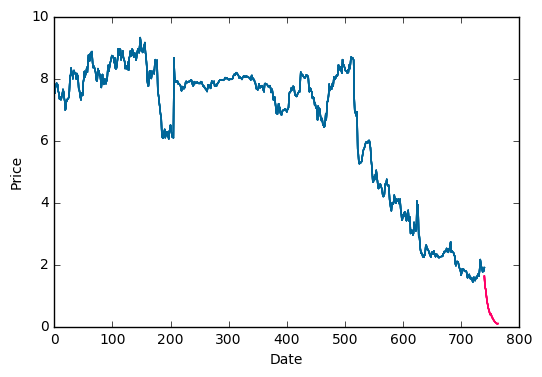

In [26]:
plt.plot(y_true, label='Original', color='#006699');
plt.plot(y_hat, color='#ff0066', label='Forecast');
plt.ylabel('Price');
plt.xlabel('Date');
plt.show()